In [4]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import sqlite3
conn = sqlite3.connect('research.db')

In [17]:
data= pd.read_csv('cleaned_4.csv')

In [19]:
data.columns

Index(['Id', 'StageName', 'Status_Reason__c', 'RecordType.Name',
       'RICE_Supported__c', 'CreatedDate', 'AccountId', 'Lead_Faculty__c',
       'Parent_Opportunity__c', 'RecordType.Name.1', 'Industry',
       'Business_Type__c', 'ParentId', 'RecordType', 'CreatedDate_month',
       'Is_External__c'],
      dtype='object')

In [20]:
data=data.drop(['Id','Status_Reason__c','AccountId'],axis=1)

In [22]:
data.head()

,StageName,RecordType.Name,RICE_Supported__c,CreatedDate,Lead_Faculty__c,Parent_Opportunity__c,RecordType.Name.1,Industry,Business_Type__c,ParentId,RecordType,CreatedDate_month,Is_External__c
0,0,Custom Education (MSPACE Included),RIC-BD&I,2019,0012e000002ZGfbAAG,0,Business Organization,Health,Multinational / Other Large Corporate,0,Custom Education (MSPACE Included)Business Org...,11,External
1,1,Parent Grant,RIC-RE&D,2018,0,0,Business Organization,Public Administration,Government: Australia: Federal,1,Parent GrantBusiness Organization,11,External
2,1,Parent Grant,RIC-RE&D,2018,0,0,Business Organization,Public Administration,Government: Australia: Federal,1,Parent GrantBusiness Organization,11,External
3,1,Parent Grant,Not supported,2019,0,0,Business Organization,Health,Government: Australia: Federal,0,Parent GrantBusiness Organization,11,External
4,1,Parent Grant,RIC-RE&D,2017,0,0,Business Organization,Public Administration,Government: Australia: Federal,1,Parent GrantBusiness Organization,11,External


In [21]:
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

In [23]:
from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder()
X[:,0] = labelencoder_X.fit_transform(X[:,0]) #opptype
X[:,1] = labelencoder_X.fit_transform(X[:,1]) #RIC Supppoted
X[:,2] = labelencoder_X.fit_transform(X[:,2]) #create year
X[:,3] = labelencoder_X.fit_transform(X[:,3]) #faculty
X[:,5] = labelencoder_X.fit_transform(X[:,5])
X[:,6] = labelencoder_X.fit_transform(X[:,6])
X[:,7] = labelencoder_X.fit_transform(X[:,7])
X[:,9] = labelencoder_X.fit_transform(X[:,9])
X[:,11] = labelencoder_X.fit_transform(X[:,11])

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (4841, 12) (4841,)
Test (1211, 12) (1211,)


In [26]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

scores = cross_val_score(estimator=logreg, X=X, y=y, cv=10, n_jobs=4)
print(scores)

C:\Users\BingLesleyYuan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy of Logistic regression classifier on training set: 0.66
Accuracy of Logistic regression classifier on test set: 0.65
[0.63861386 0.65511551 0.64628099 0.61983471 0.5553719  0.65619835
 0.61983471 0.58842975 0.64297521 0.65950413]


Feature: 0, Score: -0.13793
Feature: 1, Score: 0.22992
Feature: 2, Score: -0.05488
Feature: 3, Score: 0.07960
Feature: 4, Score: -0.39956
Feature: 5, Score: 0.24323
Feature: 6, Score: -0.00693
Feature: 7, Score: -0.01000
Feature: 8, Score: -0.15221
Feature: 9, Score: 0.10363
Feature: 10, Score: -0.02982
Feature: 11, Score: -2.40888


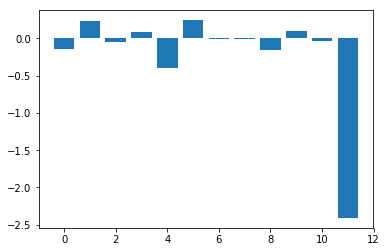

In [27]:
# get importance
importance = logreg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()